In [8]:
import sys
sys.path.append('..')
from pytorch.utils import *
from pathlib import Path
import numpy as np
import torchio as tio

In [9]:
cube_dir = Path("/storage_bizon/naravich/Unlabeled_OCT_cubes/")
for d in cube_dir.glob("*.npy"):
    print(d)
    break

/storage_bizon/naravich/Unlabeled_OCT_cubes/bat_96_s_64x64x32_02-005.npy


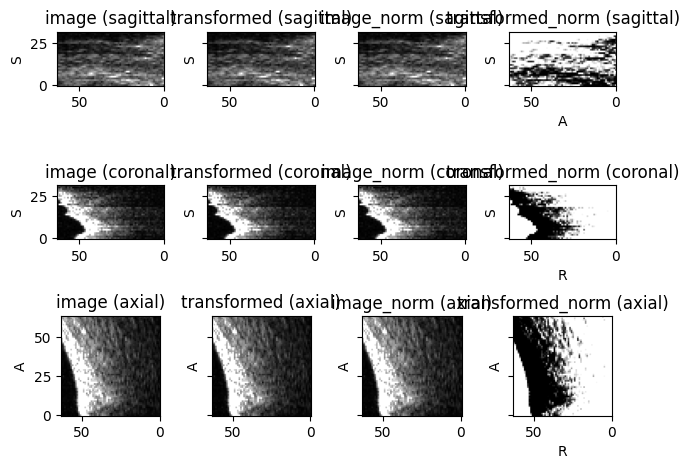

In [29]:
cube = np.load(d)
cube_norm = cube - cube.mean() 
cube_norm = cube_norm / cube_norm.std()
nl_cube = nonlinear_transformation(cube, prob=2)
nl_norm_cube = nonlinear_transformation(cube_norm, prob=2.0)

subject = tio.Subject(
    image=tio.ScalarImage(tensor=cube[np.newaxis, 0]),
    transformed=tio.ScalarImage(tensor=nl_cube[np.newaxis, 0]),
    image_norm=tio.ScalarImage(tensor=cube_norm[np.newaxis, 0]),
    transformed_norm=tio.ScalarImage(tensor=nl_norm_cube[np.newaxis, 0])
)
subject.plot()

In [1]:
import sys
sys.path.append('..')
from pytorch.utils import KFoldNNUNetSegmentationDataModule
import torchio as tio


dm = KFoldNNUNetSegmentationDataModule(fold=0, dataDir='/storage_bizon/naravich/nnUNet_Datasets/nnUNet_raw/Dataset302_Calcium_OCTv2/')
dm.setup('fit')
for data in dm.train_dataloader():
    break
print(data['image'][tio.DATA].shape, data['label'][tio.DATA].shape)


torch.Size([4, 1, 128, 128, 64]) torch.Size([4, 1, 128, 128, 64])


In [5]:
data['label'][tio.DATA].max()

tensor(1, dtype=torch.int16)

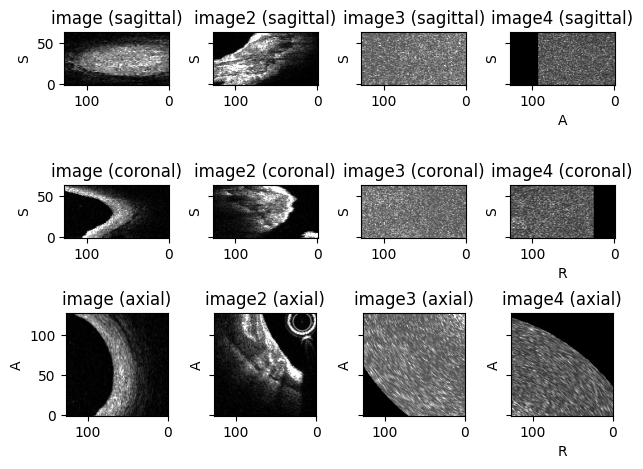

In [11]:
subject = tio.Subject(
    image=tio.ScalarImage(tensor=data['image'][tio.DATA][0]),
    # label=tio.LabelMap(tensor=data['label'][tio.DATA][0]),
    image2=tio.ScalarImage(tensor=data['image'][tio.DATA][1]),
    # label2=tio.LabelMap(tensor=data['label'][tio.DATA][1]),
    image3=tio.ScalarImage(tensor=data['image'][tio.DATA][2]),
    # label3=tio.LabelMap(tensor=data['label'][tio.DATA][2]),
    image4=tio.ScalarImage(tensor=data['image'][tio.DATA][3]),
    # label4=tio.LabelMap(tensor=data['label'][tio.DATA][3]),
)
subject.plot()


In [16]:
from tqdm import tqdm
from pytorch.config import models_genesis_config
import numpy as np
from pytorch.utils import PairDataGenerator
from torch.utils.data import DataLoader
import os

conf = models_genesis_config()

x_valid = []
for i,fold in enumerate(tqdm(conf.valid_fold)):
    file_name = "bat_"+str(conf.scale)+"_s_"+str(conf.input_rows)+"x"+str(conf.input_cols)+"x"+str(conf.input_deps)+"_"+str(fold)+".npy"
    s = np.load(os.path.join(conf.data, file_name))
    x_valid.extend(s)
x_valid = np.expand_dims(np.array(x_valid), axis=1)

valid_dataloader = PairDataGenerator(x_valid, conf)
valid_dataloader = DataLoader(valid_dataloader, batch_size=conf.batch_size, shuffle=False, num_workers=conf.workers)

for x, y in valid_dataloader:
    break

100%|██████████| 28/28 [00:01<00:00, 20.82it/s]


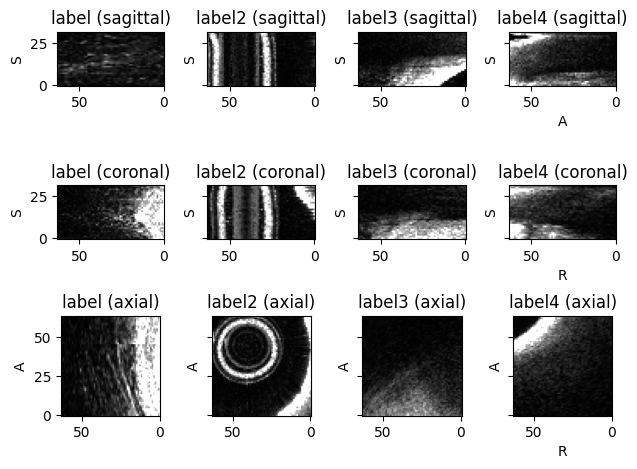

In [24]:
cube_subject = tio.Subject(
    # image=tio.ScalarImage(tensor=x[0]),
    label=tio.ScalarImage(tensor=y[0]),
    # image2=tio.ScalarImage(tensor=x[1]),
    label2=tio.ScalarImage(tensor=y[1]),
    # image3=tio.ScalarImage(tensor=x[2]),
    label3=tio.ScalarImage(tensor=y[2]),
    # image4=tio.ScalarImage(tensor=x[3]),
    label4=tio.ScalarImage(tensor=y[3]),
)
cube_subject.plot()